# Employee Performance Analysis By Mohammed

This analysis explores key factors influencing employee performance, and productivity, using authenthic HR dataset. We will examine relationships between performance scores, engagement metrics, attendance, and demographic variables. This analysis will provide meaningful insights that can help boost busniesses by improving their workforce effectiveness.

## Key Questions

##### What is the frequency of each PerformanceScore?

##### What is the average EngagementSurvey score across the company?

##### How are EmpSatisfaction, Absences per employee,  employees with DaysLateLast30, SpecialProjectsCount, and employees who were terminated distributed?

##### Do employees with higher EmpSatisfaction have better PerformanceScore ratings?

##### Does an employee with active EngagementSurvey participation have higher PerformanceScore ratings?

##### How do PerformanceScore ratings vary among different races of people, marital status, salary, gender, places, and citizenship status?

##### Which departments have the highest average PerformanceScore?

##### How does a different employment status affect the PerformanceScore rating

##### How do EmpSatisfaction, EngagementSurvey, DaysLateLast30, RecruitmentSource, departments, and managers correlate with PerformanceScore?

##### Do employees with higher Absences tend to have lower PerformanceScore?

##### Do employees hired longer ago (DateofHire) perform better than newer hires?




In [6]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# import data
hr_dataset = pd.read_csv("../data/HRDataset_v14 2.csv")



In [9]:
# view first 5 rows of your data
hr_dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [10]:
# describe your numeric columns correspond with employee performance
hr_dataset.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


# Metrics Analysis

**PerfScoreID**

The Average performance score is close to 3 where the highest score is 4 which shows that most employee are meets the fully Expectations

Median is 3 which suggest a balanced performance distribution since more than 50% of employees meet expectations.

**EngagementSurvey**

The Mean is 4.11 out of 5 which suggest that the average engagement is really high

Median is 4.28 which suggest there are 50% more positive engagement 

**EmpSatisfaction**

The Mean is 3.89 which suggest there are slightly good number of employee satisfiy with their work and company benefit 

Median is 4.0 which suggest that more than half of the employee are satisfyed with the company 

**SpecialProjectsCount**

The Mean is 1.21 which suggest very low number of employeee are working special projects. 


**Absences**

The mean is 10.24 which is high average absences which suggest that high number of employee  are not coming to work which possibly impacting productivity.


In [11]:
# Display the null values in your dataframe
hr_dataset.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [12]:
performance_counts = hr_dataset['PerformanceScore'].value_counts()
performance_counts

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Employee Performance Scores')

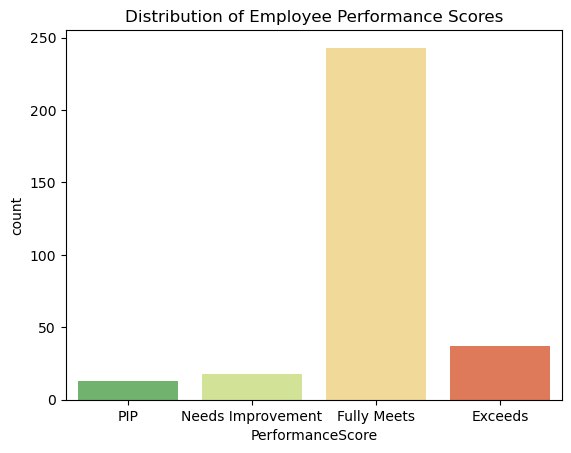

In [57]:
sns.countplot(data=hr_dataset, x='PerformanceScore', 
              order=['PIP','Needs Improvement','Fully Meets','Exceeds'],
              palette='RdYlGn',
              hue = 'PerformanceScore', legend=False,)
plt.title('Distribution of Employee Performance Scores')

The graph shows that majority of the employee have high performance score and meet the expectations which suggests most of the employee are doing well and producing good work.

There are small numbers of employee in PIP and Needs Improvemnet groups. Together they make up less than 10% of the population.

There are good number of employee exceeds the expectations and there are like one in nine employees which is small number but it's significant.


In [17]:
EmpSatisfaction_counts = hr_dataset['EmpSatisfaction'].value_counts()
EmpSatisfaction_counts

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Employee Satisfaction Distribution')

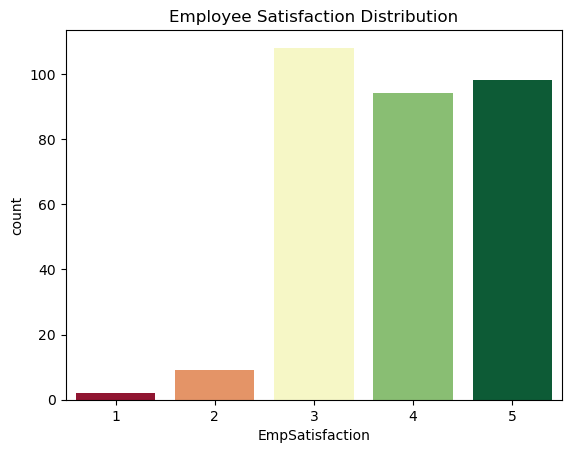

In [55]:
sns.countplot(data=hr_dataset, x='EmpSatisfaction', hue = 'EmpSatisfaction', legend=False, palette='RdYlGn')
plt.title('Employee Satisfaction Distribution')


The higher number of employee are neutral at the middle or 3 out 5 on their satisfaction rating. It shows that majority of the people are not completly unhappy with thier works or the company or company policies.

There are 2 employee who gave 1 rating and 9 people with 2 ratings. It shows that employee are not completely unsatisfied with the company, rather they are not fully satisfy. 

Although, there are good number of employee, 98, who are completely satisfy with thier workload and company policies and more. 

Overall, Strong majority are content or happy at work

In [18]:
EngagementSurvey_counts = hr_dataset['EngagementSurvey'].value_counts()
EngagementSurvey_counts

EngagementSurvey
5.00    56
4.50    19
4.20    17
4.30    17
4.10    16
        ..
3.11     1
2.50     1
3.42     1
4.07     1
3.20     1
Name: count, Length: 119, dtype: int64

Text(0.5, 1.0, 'Engagement Survey Distribution')

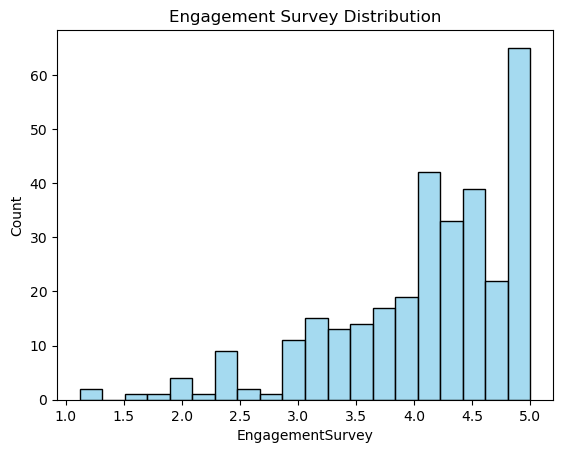

In [41]:
sns.histplot(hr_dataset['EngagementSurvey'], bins=20, color='skyblue')
plt.title('Engagement Survey Distribution')

The histagram is left skewed which mean that mean is less than the median. 

More values are on the right sides which suggests that more employees have high engagement in the company. 

Most employees gave a 5 on engagement which can suggest that company's culture, leadership and policies align with the employee's interests.

More than 50 employee are are highly engaged in the company which shows that company promote different engagement events and parties are held at the company. 

Text(0.5, 1.0, 'Employee Absences Distribution')

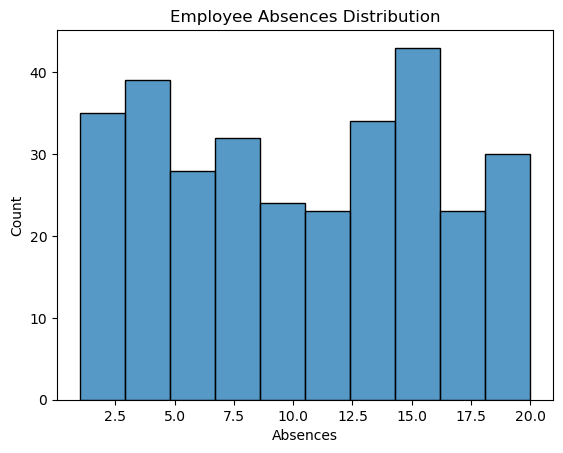

In [61]:
sns.histplot(hr_dataset['Absences'])
plt.title('Employee Absences Distribution')

There are good numbers of absences in the companies. 

The highest number of absences is 15.0 which is very high which can profound impect on the productivity. 

High absences suggests that there most likely have lower work effectiveness due to it. 

These absences can mean that company is lenient with absenses therefore it is so high and it also means that compnay do not enforce any kind of penelty of absences.

In [26]:
Absences_counts = hr_dataset['DaysLateLast30'].value_counts().sort_index
Absences_counts

<bound method Series.sort_index of DaysLateLast30
0    278
4      8
2      6
3      6
5      6
6      6
1      1
Name: count, dtype: int64>

Text(0.5, 1.0, 'Distribution of Late Arrivals (Last 30 Days)')

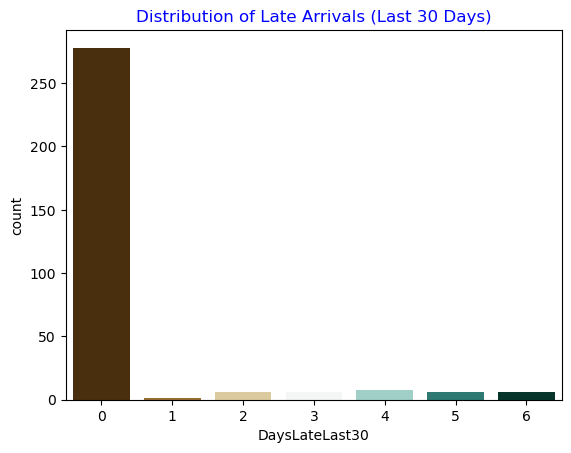

In [63]:
sns.countplot(data=hr_dataset, x='DaysLateLast30', palette='BrBG', hue = 'DaysLateLast30', legend=False)
plt.title('Distribution of Late Arrivals (Last 30 Days)', color='blue')

There are none high or slightly high lateness in the last 30 days which is surprissing due to the fact they are very high absences but none lateness.

The highestest number of days of lateness is 4 where only 8 people came in late for the last month.

It suggests that they are effective late polices exists in the compmay therefore 278 employees didn't came in late even once in the last 30 days. 

In [28]:
SpecialProjectsCount_counts = hr_dataset['SpecialProjectsCount'].value_counts().sort_index
SpecialProjectsCount_counts

<bound method Series.sort_index of SpecialProjectsCount
0    241
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: count, dtype: int64>

Text(0.5, 1.0, 'Distribution of Special Projects')

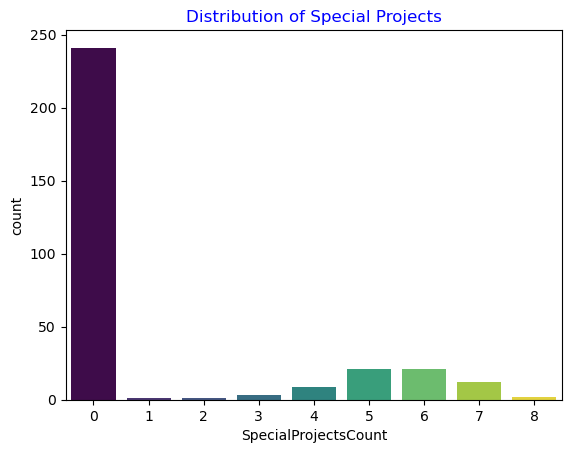

In [67]:
sns.countplot(data=hr_dataset, x='SpecialProjectsCount', palette='viridis', hue = 'SpecialProjectsCount', legend=False)
plt.title('Distribution of Special Projects', color='blue')

The graph suggest that the majority of the employee are in any kind of special projects

There are only 21 employees out of 300 employee are on 5 to 6 special projects
which is a low number.

Some selective employees are prioritizing and their chances of higher growth at the company can be determined by that.

In [30]:
EmploymentStatus_counts = hr_dataset['EmploymentStatus'].value_counts().sort_index
EmploymentStatus_counts

<bound method Series.sort_index of EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64>

Text(0.5, 1.0, 'Distribution of Employment Status')

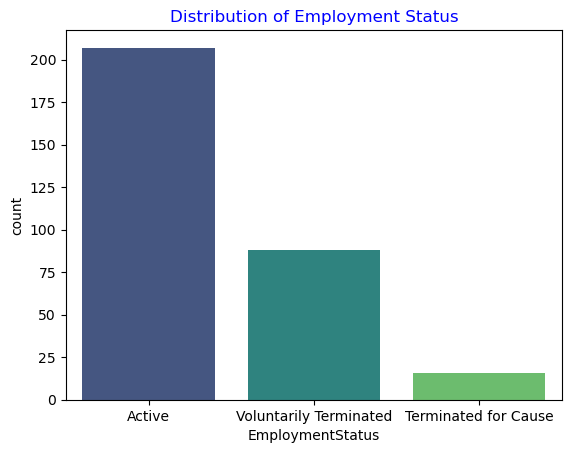

In [68]:
sns.countplot(data=hr_dataset, x='EmploymentStatus', palette='viridis', hue = 'EmploymentStatus', legend=False)
plt.title('Distribution of Employment Status', color='blue')

Most of the employee are active, however there are good number of people, 88 employee, are voluntarily Terminated.

Voluntarily Terminatation can be due to the large number of absences which led to lower work being done and lower productivity.


In [32]:
Termd_counts = hr_dataset['Termd'].value_counts().sort_index
Termd_counts

<bound method Series.sort_index of Termd
0    207
1    104
Name: count, dtype: int64>

Text(0.5, 1.0, 'Distribution of Past Termination')

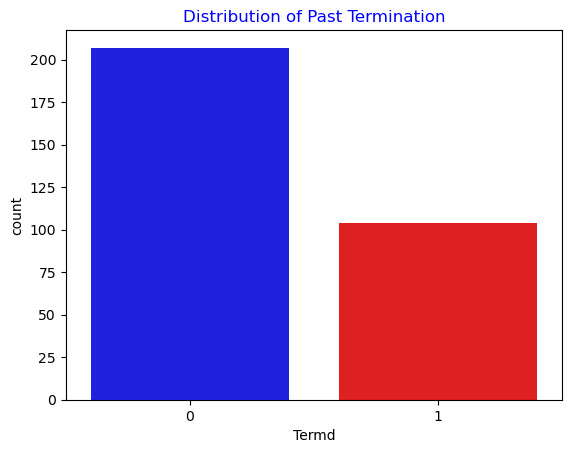

In [69]:
sns.countplot(data=hr_dataset, x='Termd', palette=['blue', 'red'], hue = 'Termd', legend=False)
plt.title('Distribution of Past Termination', color='blue')

There are 104 employee out of 311 has been terminated before which is a large number to consider.

One‑third of the people in this company have experienced a termination event.

This also can be due to higher absences.